# Table of Contents for example analysis (Fig. 5c)
 <p><div class="lev1 toc-item"><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></div><div class="lev1 toc-item"><a href="#Load-HEK293T-WT-6-hour-data" ><span class="toc-item-num">2&nbsp;&nbsp;</span>Load HEK293T WT 6 hour data</a></div> </span><a href="#Plot-inset" data-toc-modified-id="Plot-inset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot inset</a></div>
 
* this analysis is repeated for all polysome profiles below: Fig. 5E; Supp. Fig. 5C

# Import libraries

In [2]:
library(tidyverse)
library(Cairo)
options(warn=-1)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#666666", "#E69F00", "#56B4E9", 
               "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

theme_set(theme_classic(base_family = "Helvetica", base_size = 8) +
theme(          
  strip.background = element_blank(),
  strip.text.x = element_text(size = 8),
  axis.line = element_line(size = .25),
  axis.ticks = element_line(size = .25),
  axis.text.x = element_text(size = 8, color = 'black'),
  axis.text.y = element_text(size = 8, color = 'black'),
  legend.text = element_text(size = 8),
    
))

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
“package ‘purrr’ was built under R version 3.4.1”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Load HEK293T WT 6 hour data

In [3]:
datafiles <- '../rawdata/polysome_profiles/fig5/RPb_polysomes_hrgfpragbq99lgcn2kohct116/processeddata'  %>% 
  list.files(pattern = c("293t_arg.csv|293t_leu.csv|293t_rich.csv"), full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("([^_/.]+)[^/_]+$") %>% 
  magrittr::extract(,2)
newnames = c("arg" = "–Arg", "leu" = "–Leu", "rich" = "Rich")

data <- datafiles %>% 
      lapply(. %>% read_csv(col_types = cols_only('Distance'='n', 'Absorbance'='n'), skip=32)) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'sample') %>% 
  mutate(sample = as.factor(newnames[sample])) %>% 
  mutate(sample = forcats::fct_rev(sample))

peak <- data %>% 
  group_by(sample) %>% 
  # skip supernatant peak
  filter(Distance > 20) %>% 
  # find monosome peak
  filter(Absorbance == max(Absorbance)) %>% 
  ungroup() %>% 
  mutate(peakdistance = Distance - mean(Distance)) %>% 
  mutate(absorbancefactor = Absorbance / max(Absorbance)) %>% 
  select(sample, peakdistance, absorbancefactor)

data <- data %>% 
  left_join(peak, by = "sample") %>% 
  # shift along x-axis
  mutate(Distance = Distance - peakdistance) %>% 
  # normalize by max monosome peak absorbance
  mutate(Absorbance = Absorbance / absorbancefactor) %>% 
  print

# A tibble: 6,266 x 5
   sample    Distance Absorbance peakdistance absorbancefactor
   <fctr>       <dbl>      <dbl>        <dbl>            <dbl>
 1   –Arg -0.36333333   0.044395    0.4033333                1
 2   –Arg -0.32333333   0.044476    0.4033333                1
 3   –Arg -0.29333333   0.044427    0.4033333                1
 4   –Arg -0.25333333   0.044340    0.4033333                1
 5   –Arg -0.21333333   0.044076    0.4033333                1
 6   –Arg -0.18333333   0.044009    0.4033333                1
 7   –Arg -0.14333333   0.043965    0.4033333                1
 8   –Arg -0.10333333   0.043933    0.4033333                1
 9   –Arg -0.07333333   0.043963    0.4033333                1
10   –Arg -0.03333333   0.043896    0.4033333                1
# ... with 6,256 more rows


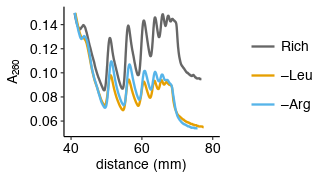

In [4]:
options(repr.plot.width = 2.75, repr.plot.height = 1.5)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.5, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.052, 0.15)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(40,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.title=element_blank()) 
  
p

ggsave("../figures/fig5c.pdf", width = 2.75, height = 1.5, device = cairo_pdf)

# Plot inset

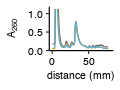

In [6]:
options(repr.plot.width = 1, repr.plot.height = 0.75)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.25, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.052, 1.135)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.position = "none", 
        text = element_text(size = 6), 
        axis.text.x = element_text(size = 6),
        axis.text.y = element_text(size = 6)) 
  
p

ggsave("../figures/fig5c_inset.pdf", width = 1, height = .75, device = cairo_pdf)

# repeat for HEK293T GCN2 KO 6 hour data (fig. 5e)

In [7]:
datafiles <- '../rawdata/polysome_profiles/fig5/RPb_polysomes_hrgfpragbq99lgcn2kohct116/processeddata'  %>% 
  list.files(pattern = c("gcn2ko_arg.csv|gcn2ko_leu.csv|gcn2ko_rich.csv"), full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("([^_/.]+)[^/_]+$") %>% 
  magrittr::extract(,2)
newnames = c("arg" = "–Arg", "leu" = "–Leu", "rich" = "Rich")

data <- datafiles %>% 
      lapply(. %>% read_csv(col_types = cols_only('Distance'='n', 'Absorbance'='n'), skip=32)) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'sample') %>% 
  mutate(sample = as.factor(newnames[sample])) %>% 
  mutate(sample = forcats::fct_rev(sample))

peak <- data %>% 
  group_by(sample) %>% 
  # skip supernatant peak
  filter(Distance > 20) %>% 
  # find monosome peak
  filter(Absorbance == max(Absorbance)) %>% 
  ungroup() %>% 
  mutate(peakdistance = Distance - mean(Distance)) %>% 
  mutate(absorbancefactor = Absorbance / max(Absorbance)) %>% 
  select(sample, peakdistance, absorbancefactor)

data <- data %>% 
  left_join(peak, by = "sample") %>% 
  # shift along x-axis
  mutate(Distance = Distance - peakdistance) %>% 
  # normalize by max monosome peak absorbance
  mutate(Absorbance = Absorbance / absorbancefactor) %>% 
  print

# A tibble: 6,599 x 5
   sample  Distance Absorbance peakdistance absorbancefactor
   <fctr>     <dbl>      <dbl>        <dbl>            <dbl>
 1   –Arg 0.8566667 0.06356623   -0.8166667        0.7710384
 2   –Arg 0.8966667 0.06357401   -0.8166667        0.7710384
 3   –Arg 0.9266667 0.06336650   -0.8166667        0.7710384
 4   –Arg 0.9666667 0.06308117   -0.8166667        0.7710384
 5   –Arg 1.0066667 0.06295666   -0.8166667        0.7710384
 6   –Arg 1.0366667 0.06281789   -0.8166667        0.7710384
 7   –Arg 1.0766667 0.06283604   -0.8166667        0.7710384
 8   –Arg 1.1166667 0.06282048   -0.8166667        0.7710384
 9   –Arg 1.1466667 0.06281529   -0.8166667        0.7710384
10   –Arg 1.1866667 0.06284901   -0.8166667        0.7710384
# ... with 6,589 more rows


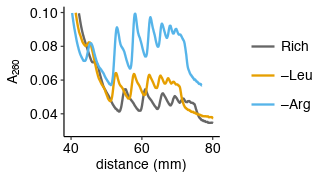

In [10]:
options(repr.plot.width = 2.75, repr.plot.height = 1.5)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.5, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.03, 0.1)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(40,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.title=element_blank()) 
  
p

ggsave("../figures/fig5e.pdf", width = 2.75, height = 1.5, device = cairo_pdf)

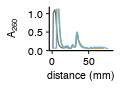

In [11]:
options(repr.plot.width = 1, repr.plot.height = 0.75)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.25, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.052, 1.135)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.position = "none", 
        text = element_text(size = 6), 
        axis.text.x = element_text(size = 6),
        axis.text.y = element_text(size = 6)) 
  
p

ggsave("../figures/fig5e_inset.pdf", width = 1, height = .75, device = cairo_pdf)

# repeat for HEK293T +hrGFP 6 hour data (supp. fig. 5c)

In [23]:
datafiles <- '../rawdata/polysome_profiles/fig5/RPb_polysomes_hrgfpragbq99lgcn2kohct116/processeddata'  %>% 
  list.files(pattern = c("hrgfp_arg.csv|hrgfp_leu.csv|hrgfp_rich.csv"), full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("([^_/.]+)[^/_]+$") %>% 
  magrittr::extract(,2)
newnames = c("arg" = "–Arg", "leu" = "–Leu", "rich" = "Rich")

data <- datafiles %>% 
      lapply(. %>% read_csv(col_types = cols_only('Distance'='n', 'Absorbance'='n'), skip=32)) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'sample') %>% 
  mutate(sample = as.factor(newnames[sample])) %>% 
  mutate(sample = forcats::fct_rev(sample))

peak <- data %>% 
  group_by(sample) %>% 
  # skip supernatant peak
  filter(Distance > 20) %>% 
  # find monosome peak
  filter(Absorbance == max(Absorbance)) %>% 
  ungroup() %>% 
  mutate(peakdistance = Distance - mean(Distance)) %>% 
  mutate(absorbancefactor = Absorbance / max(Absorbance)) %>% 
  select(sample, peakdistance, absorbancefactor)

data <- data %>% 
  left_join(peak, by = "sample") %>% 
  # shift along x-axis
  mutate(Distance = Distance - peakdistance) %>% 
  # normalize by max monosome peak absorbance
  mutate(Absorbance = Absorbance / absorbancefactor) %>% 
  print

# A tibble: 6,485 x 5
   sample Distance Absorbance peakdistance absorbancefactor
   <fctr>    <dbl>      <dbl>        <dbl>            <dbl>
 1   –Arg    -0.15   0.046935         0.19                1
 2   –Arg    -0.12   0.046717         0.19                1
 3   –Arg    -0.08   0.046562         0.19                1
 4   –Arg    -0.04   0.046489         0.19                1
 5   –Arg    -0.01   0.046493         0.19                1
 6   –Arg     0.03   0.046435         0.19                1
 7   –Arg     0.07   0.046471         0.19                1
 8   –Arg     0.11   0.046479         0.19                1
 9   –Arg     0.14   0.046530         0.19                1
10   –Arg     0.18   0.046481         0.19                1
# ... with 6,475 more rows


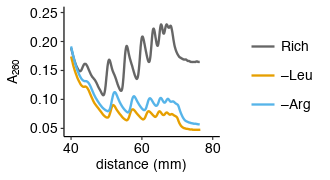

In [24]:
options(repr.plot.width = 2.75, repr.plot.height = 1.5)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.5, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.046, 0.25)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(40,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.title=element_blank()) 
  
p

ggsave("../figures/suppfig5c_hrgfp.pdf", width = 2.75, height = 1.5, device = cairo_pdf)

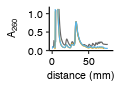

In [25]:
options(repr.plot.width = 1, repr.plot.height = 0.75)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.25, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.052, 1.135)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.position = "none", 
        text = element_text(size = 6), 
        axis.text.x = element_text(size = 6),
        axis.text.y = element_text(size = 6)) 
  
p

ggsave("../figures/suppfig5c_hrgfp_inset.pdf", width = 1, height = .75, device = cairo_pdf)

# repeat for HEK293T +RagB-Q99L 6 hour data (supp. fig. 5c)

In [26]:
datafiles <- '../rawdata/polysome_profiles/fig5/RPb_polysomes_hrgfpragbq99lgcn2kohct116/processeddata'  %>% 
  list.files(pattern = c("q99l_arg.csv|q99l_leu.csv|q99l_rich.csv"), full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("([^_/.]+)[^/_]+$") %>% 
  magrittr::extract(,2)
newnames = c("arg" = "–Arg", "leu" = "–Leu", "rich" = "Rich")

data <- datafiles %>% 
      lapply(. %>% read_csv(col_types = cols_only('Distance'='n', 'Absorbance'='n'), skip=32)) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'sample') %>% 
  mutate(sample = as.factor(newnames[sample])) %>% 
  mutate(sample = forcats::fct_rev(sample))

peak <- data %>% 
  group_by(sample) %>% 
  # skip supernatant peak
  filter(Distance > 20) %>% 
  # find monosome peak
  filter(Absorbance == max(Absorbance)) %>% 
  ungroup() %>% 
  mutate(peakdistance = Distance - mean(Distance)) %>% 
  mutate(absorbancefactor = Absorbance / max(Absorbance)) %>% 
  select(sample, peakdistance, absorbancefactor)

data <- data %>% 
  left_join(peak, by = "sample") %>% 
  # shift along x-axis
  mutate(Distance = Distance - peakdistance) %>% 
  # normalize by max monosome peak absorbance
  mutate(Absorbance = Absorbance / absorbancefactor) %>% 
  print

# A tibble: 6,533 x 5
   sample  Distance Absorbance peakdistance absorbancefactor
   <fctr>     <dbl>      <dbl>        <dbl>            <dbl>
 1   –Arg 0.9933333   0.045049   -0.9533333                1
 2   –Arg 1.0233333   0.045047   -0.9533333                1
 3   –Arg 1.0633333   0.045014   -0.9533333                1
 4   –Arg 1.1033333   0.044942   -0.9533333                1
 5   –Arg 1.1433333   0.045053   -0.9533333                1
 6   –Arg 1.1733333   0.045024   -0.9533333                1
 7   –Arg 1.2133333   0.045002   -0.9533333                1
 8   –Arg 1.2533333   0.044978   -0.9533333                1
 9   –Arg 1.2833333   0.044972   -0.9533333                1
10   –Arg 1.3233333   0.044986   -0.9533333                1
# ... with 6,523 more rows


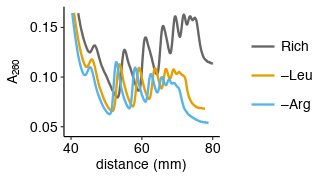

In [31]:
options(repr.plot.width = 2.75, repr.plot.height = 1.5)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.5, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.046, 0.165)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(40,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.title=element_blank()) 
  
p

ggsave("../figures/suppfig5c_q99l.pdf", width = 2.75, height = 1.5, device = cairo_pdf)

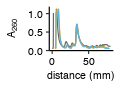

In [32]:
options(repr.plot.width = 1, repr.plot.height = 0.75)

p  <- data %>%
  ggplot(aes(x = Distance, y = Absorbance, color = sample)) +
  geom_line(size=.25, alpha=1)  +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0.052, 1.135)) +
  scale_x_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0,80)) +
  scale_color_manual(values = cbPalette) +
  xlab("distance (mm)") + ylab(expression("A"[260])) +
  theme(legend.position = "none", 
        text = element_text(size = 6), 
        axis.text.x = element_text(size = 6),
        axis.text.y = element_text(size = 6)) 
  
p

ggsave("../figures/suppfig5c_q99l_inset.pdf", width = 1, height = .75, device = cairo_pdf)

# plot for polysome / monosome ratio (supp. fig. 5c)

In [22]:
file <- "../rawdata/polysome_profiles/hrgfpq99lgcn2kohct116.csv"
data <- read_csv(file, col_types = c(col_integer())) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(cellines, samplelabel, sep = "_")) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, sampleorder)) %>% 
  arrange(xlabel) %>% 
  print

# A tibble: 12 x 5
    cellines samplelabel relative_poly_fraction sampleorder         xlabel
       <chr>       <chr>                  <dbl>       <int>         <fctr>
 1        WT        Rich              1.0000000           1        WT_Rich
 2        WT        –Leu              0.7561536           2        WT_–Leu
 3        WT        –Arg              0.8158620           3        WT_–Arg
 4     hrGFP        Rich              1.0000000           4     hrGFP_Rich
 5     hrGFP        –Leu              0.6658614           5     hrGFP_–Leu
 6     hrGFP        –Arg              0.7301899           6     hrGFP_–Arg
 7 RagB-Q99L        Rich              1.0000000           7 RagB-Q99L_Rich
 8 RagB-Q99L        –Leu              0.8612752           8 RagB-Q99L_–Leu
 9 RagB-Q99L        –Arg              0.8226321           9 RagB-Q99L_–Arg
10   GCN2 KO        Rich              1.0000000          10   GCN2 KO_Rich
11   GCN2 KO        –Leu              1.1719656          11   GCN2 KO_–Leu
12   G

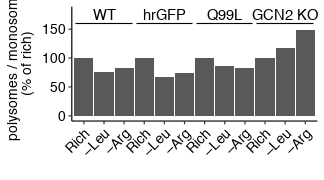

In [44]:
options(repr.plot.width = 2.7, repr.plot.height = 1.5)

test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

p  <- data %>%
  ggplot(aes(x = xlabel, y = relative_poly_fraction * 100)) +
  geom_col() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=4), limits = c(0, 180)) +
  scale_x_discrete(labels = test) +
  xlab("") + ylab("polysomes / monosome \n(% of rich)") +
  annotate("segment", x = 0.6, xend = 3.4, y = 160, yend = 160, size = 0.25) +
  annotate("text", x = 2, y = 166, label = "WT", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.4, y = 160, yend = 160, size = 0.25) +
  annotate("text", x = 5, y = 166, label = "hrGFP", vjust = 0, size = 3) +
  annotate("segment", x = 6.6, xend = 9.4, y = 160, yend = 160, size = 0.25) +
  annotate("text", x = 8, y = 166, label = "Q99L", vjust = 0, size = 3) +
  annotate("segment", x = 9.6, xend = 12.4, y = 160, yend = 160, size = 0.25) +
  annotate("text", x = 11, y = 166, label = "GCN2 KO", vjust = 0, size = 3)  

p

ggsave("../figures/suppfig5_polymonoratio.pdf", width = 2.7, height = 1.5, device = cairo_pdf)